# Problema 1: Estimativa de salário
- Conjunto de dados: emprego.csv
- Utilize os métodos abaixo para realizar a estimativa de salário
    - Regressão linear
    - Random forest
    - Rede neural artificial
- Prepare os dados para possibilitar o melhor desempenho dos métodos

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

empregos = pd.read_csv('../datas/emprego.csv')
empregos.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Tratamento dos dados, preenchimento dos salários faltantes com a média dos existentes

In [216]:
empregos_tratados = empregos.fillna({'salary': empregos["salary"].mean()})
empregos_tratados=empregos_tratados.replace({'workex': {'No': 0, 'Yes': 1}})

C:\Users\Igor\AppData\Local\Temp\ipykernel_9772\2728661498.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  empregos_tratados=empregos_tratados.replace({'workex': {'No': 0, 'Yes': 1}})


In [217]:
x = empregos_tratados[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p']]
y = empregos_tratados['salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)
X_train, X_test, y_train, y_test 

(     ssc_p  hsc_p  degree_p  workex  etest_p  mba_p
 1    79.33  78.33     77.48       1    86.50  66.28
 140  65.00  64.80     69.50       1    56.00  56.94
 179  77.80  64.00     64.20       0    75.50  72.14
 142  85.00  60.00     73.43       1    60.00  61.29
 62   86.50  64.20     67.40       0    59.00  59.69
 ..     ...    ...       ...     ...      ...    ...
 190  64.00  70.20     61.00       0    50.00  62.50
 69   73.00  73.00     66.00       1    70.00  68.07
 120  58.00  40.00     59.00       0    73.00  58.81
 19   60.00  67.00     70.00       1    50.48  77.89
 42   49.00  39.00     65.00       0    63.00  51.21
 
 [150 rows x 6 columns],
      ssc_p  hsc_p  degree_p  workex  etest_p  mba_p
 109  52.00   63.0      65.0       1    86.00  56.09
 132  67.00   68.0      64.0       1    74.40  53.49
 134  77.44   92.0      72.0       1    94.00  67.13
 123  74.00   59.0      73.0       1    60.00  56.70
 147  70.00   74.0      65.0       0    83.00  62.28
 ..     ...    ... 

In [218]:
from sklearn.linear_model import LinearRegression
regressao = LinearRegression()
regressao.fit(X_train,y_train)

LinearRegression()

156268.91374581514 [ -665.1963712     24.36269332  -518.66186848 21654.07050355
   997.28873097  2079.2972746 ]


Text(0, 0.5, 'Salario estimado')

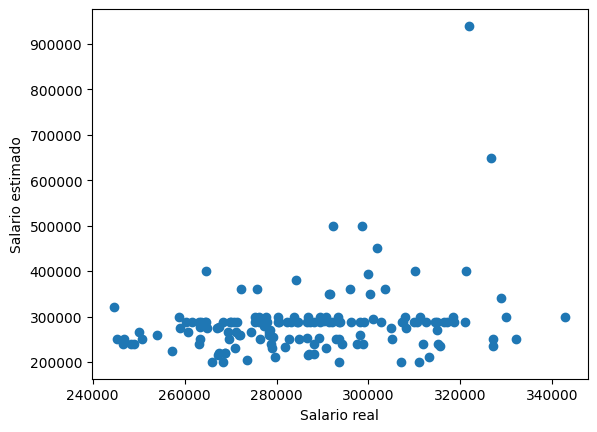

In [219]:
print(regressao.intercept_,regressao.coef_)
import matplotlib.pyplot as plt
predicao = regressao.predict(X_train)
plt.scatter(predicao,y_train)
plt.xlabel('Salario real')
plt.ylabel('Salario estimado')

In [220]:
from sklearn import metrics
import numpy as np

predicao = regressao.predict(X_test)

print('r2:', metrics.r2_score(y_test, predicao))
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predicao)))

r2: 0.0014999046625477908
MAE: 41266.73883050874
MSE: 5279201635.515542
RMSE: 72658.11472585524


### Randon forest

In [221]:
from sklearn.ensemble import RandomForestRegressor

randomdoregressor = RandomForestRegressor(n_estimators=100)

randomdoregressor.fit(X_train,y_train)

RandomForestRegressor()

In [222]:
predicaoregressor = randomdoregressor.predict(X_test)
print(predicaoregressor)

[286077.2972973  280936.55405405 259486.21621622 266716.21621622
 388171.41891892 274438.04054054 270298.71621622 312997.97297297
 253706.21621622 302359.12162162 259193.10810811 296955.54054054
 302678.10810811 282320.47297297 266238.31081081 302886.55405405
 249887.97297297 258781.75675676 315436.55405405 328921.41891892
 289700.81081081 293140.2027027  287332.43243243 278026.35135135
 329138.98648649 295507.09459459 295062.77027027 288871.75675676
 262379.32432432 290186.08108108 273473.58108108 281490.40540541
 265749.72972973 305496.01351351 288659.66216216 497379.66216216
 289132.2972973  295604.59459459 287976.08108108 264689.32432432
 287633.58108108 347729.66216216 265976.55405405 378391.41891892
 286722.63513514 288909.32432432 263419.66216216 274185.2027027
 295978.31081081 263942.09459459 304238.04054054 292345.60810811
 335942.09459459 298712.5        284830.2027027  324567.97297297
 301754.25675676 300452.09459459 286772.5        302830.81081081
 327637.2972973  290002.77

In [223]:
from sklearn import metrics
import numpy as np
print('r2:', metrics.r2_score(y_test, predicaoregressor))
print('MAE:', metrics.mean_absolute_error(y_test, predicaoregressor))
print('MSE:', metrics.mean_squared_error(y_test, predicaoregressor))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicaoregressor)))

r2: -0.11303449601003823
MAE: 45240.19646569649
MSE: 5884760110.849649
RMSE: 76712.1901059385


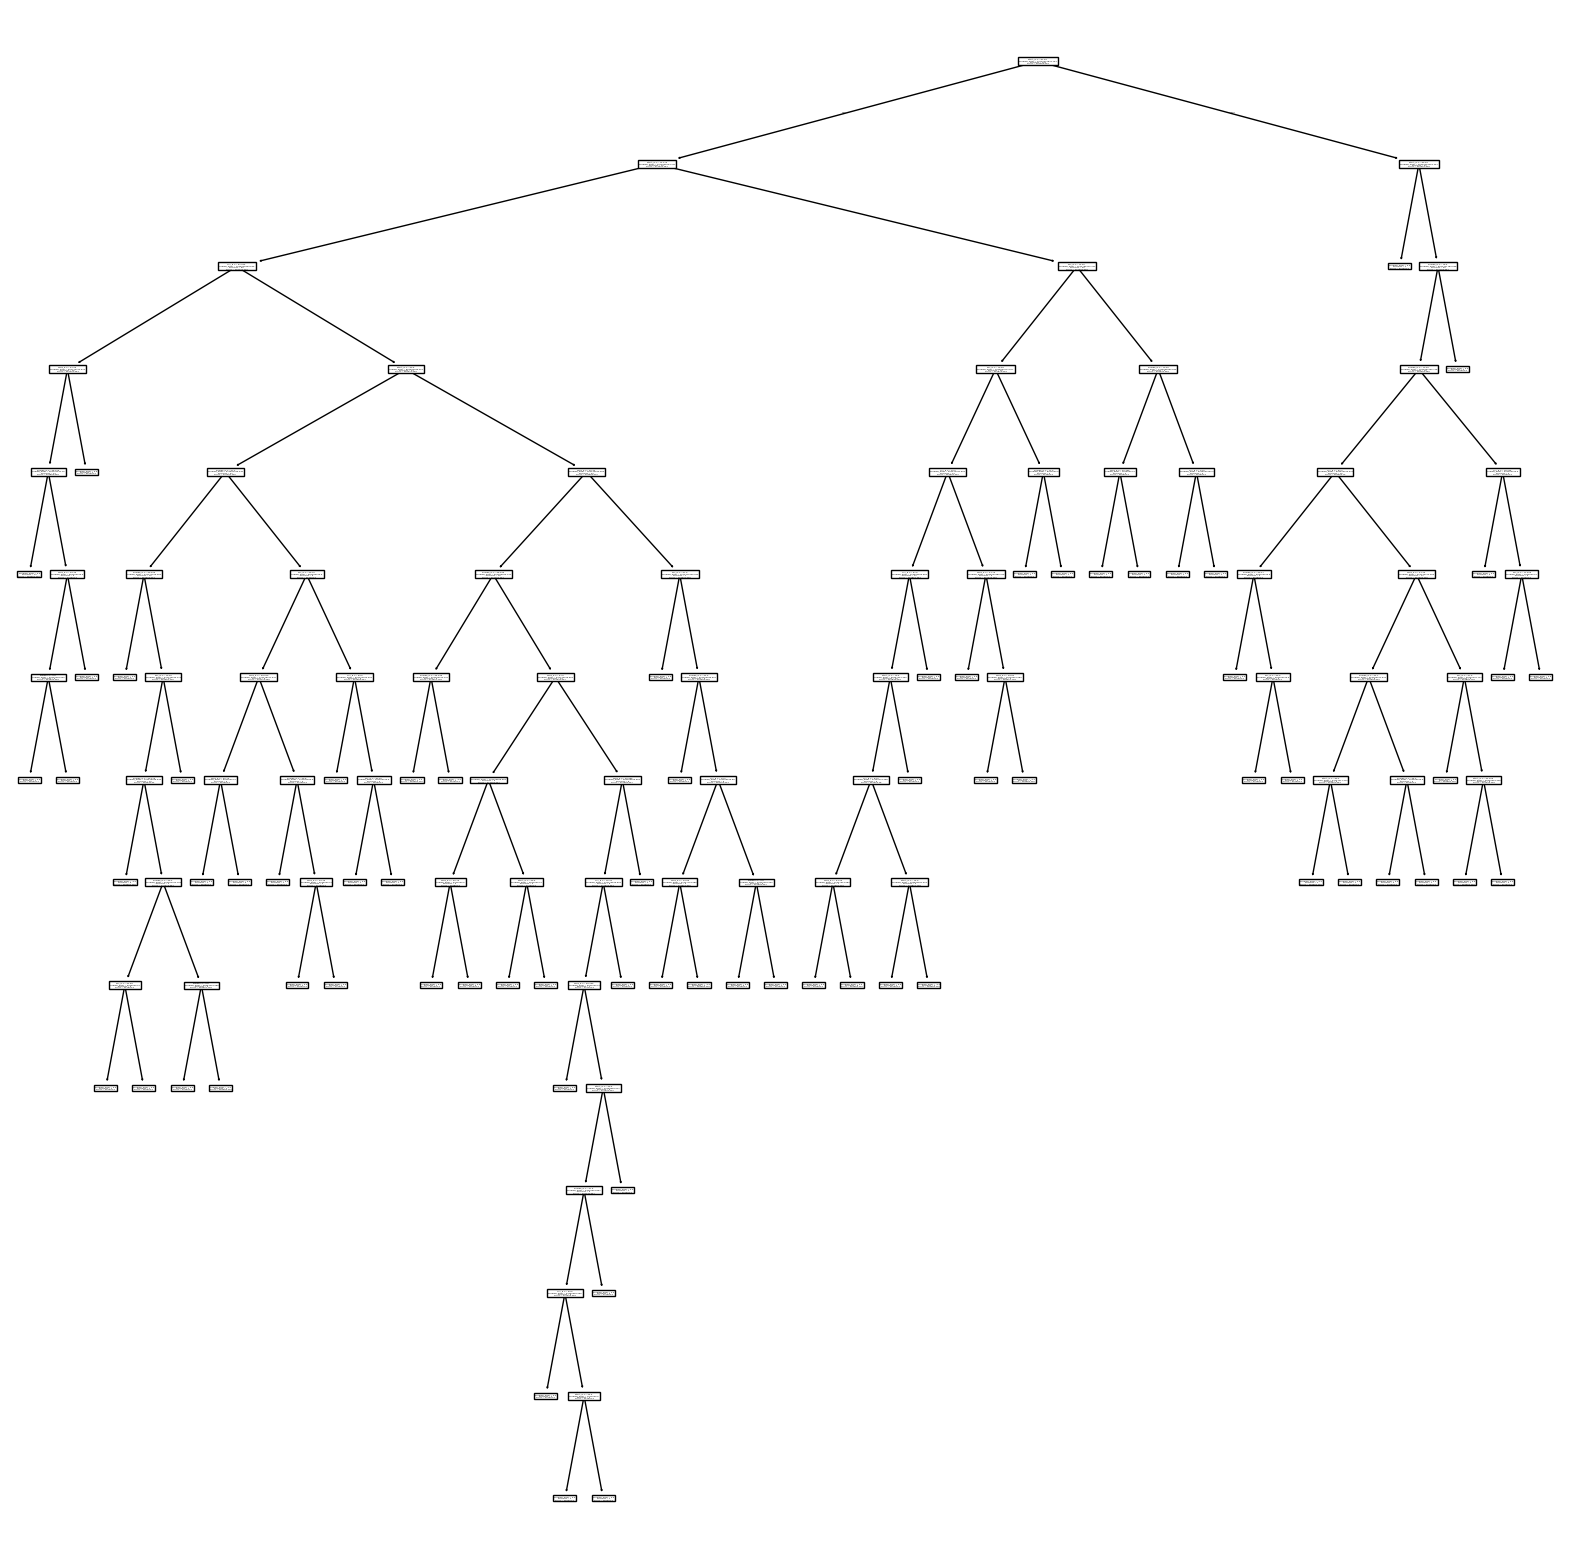

In [224]:
from sklearn import tree

features = list(x.columns)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
nhas = tree.plot_tree(randomdoregressor.estimators_[0], feature_names=features, class_names=randomdoregressor.__class__)

### Rede neural artificial

In [225]:
from sklearn.neural_network import MLPRegressor

modelo = MLPRegressor(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=5000,
    shuffle=True,
    random_state=20,
    validation_fraction=0.2,
    verbose=False)

In [226]:
modelo.fit(X_train, y_train)

C:\Users\Igor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=5000, random_state=20,
             validation_fraction=0.2)

Text(0, 0.5, 'Loss')

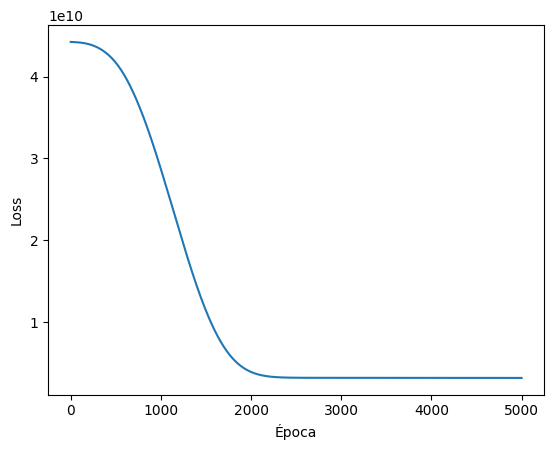

In [227]:
plt.plot(modelo.loss_curve_)
plt.xlabel('Época')
plt.ylabel('Loss')

In [228]:
print('Dados de treinamento')

predicao = modelo.predict(X_train)

print('r2:', metrics.r2_score(y_train, predicao))
print('MAE:', metrics.mean_absolute_error(y_train, predicao))
print('MSE:', metrics.mean_squared_error(y_train, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predicao)))

Dados de treinamento
r2: -0.03370522403576515
MAE: 48144.515030891685
MSE: 6467154989.399886
RMSE: 80418.62339906028


In [229]:
print('Dados de teste')

predicao = modelo.predict(X_test)

print('r2:', metrics.r2_score(y_test, predicao))
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao)))

Dados de teste
r2: -0.11440503424769854
MAE: 48272.63546203068
MSE: 5892006327.189117
RMSE: 76759.4054640154


## A regressão linear foi o melhor com base nos seguintes pontos:

- Tem o maior valor de R² (embora ainda seja muito baixo, é melhor que os valores negativos dos outros métodos).
- Apresenta o menor MAE, indicando que, em média, os erros absolutos são menores.
- Tem o menor MSE e RMSE, indicando menor variabilidade nos erros e menor magnitude dos erros quadráticos.

# Problema 2: Identificação de faixa de preço
- Conjunto de dados: celulares.csv
- Utilize os métodos abaixo para identificar a faixa de preço dos celulares
  - Regressão logística
  - Árvore de decisão
  - Rede neural artificial
- Prepare os dados para possibilitar o melhor desempenho dos métodos

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import graphviz
from IPython.display import display

celulares = pd.read_csv('../datas/celulares.csv')
celulares.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [231]:
X = celulares.drop('price_range', axis=1)
y = celulares['price_range']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [233]:
# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regressão Logística

In [234]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_classification_report = classification_report(y_test, y_pred_logistic)
print("Regressão Logística")
print("Acurácia:", logistic_accuracy)
print(logistic_classification_report)

Regressão Logística
Acurácia: 0.9533333333333334
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       146
           1       0.97      0.92      0.95       157
           2       0.95      0.94      0.94       160
           3       0.94      0.97      0.96       137

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



### Árvore de Decisão


In [235]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_classification_report = classification_report(y_test, y_pred_tree)
print("Árvore de Decisão")
print("Acurácia:", tree_accuracy)
print(tree_classification_report)

Árvore de Decisão
Acurácia: 0.8483333333333334
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       146
           1       0.86      0.76      0.80       157
           2       0.77      0.83      0.80       160
           3       0.89      0.87      0.88       137

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



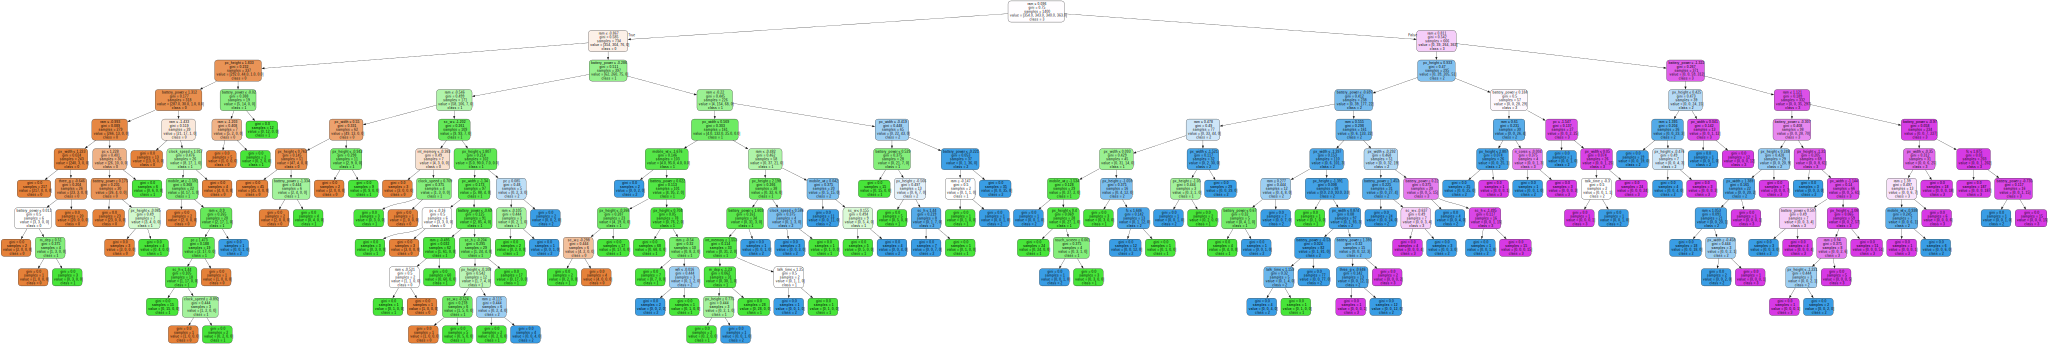

In [236]:
dot_data = export_graphviz(tree_model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=[str(i) for i in sorted(y.unique())],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
display(graph)

### Rede Neural Artificial

In [237]:
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_classification_report = classification_report(y_test, y_pred_mlp)
print("Rede Neural Artificial")
print("Acurácia:", mlp_accuracy)
print(mlp_classification_report)

Rede Neural Artificial
Acurácia: 0.9
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       146
           1       0.89      0.85      0.87       157
           2       0.88      0.89      0.89       160
           3       0.93      0.93      0.93       137

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



C:\Users\Igor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# Para o segundo problema a Regressão Logística se mostrou o melhor método, poís obteve a melhor Acurácia.